<a href="https://colab.research.google.com/github/alaks1377/logisticregression-project/blob/main/project_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Section 1 Data Loading

Part 1. Load the dataset into the notebook

In [1]:
import pandas as pd
data=pd.read_csv('/content/portu_banking_final.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Part II : Explore and make note of Attribute Information from UCI

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In UCI , Age is Numeric  but in our Dataset Age is Object , we have to look into it.

Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?

In [4]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [5]:
val_y_1=len(data[data['y']==1])
val_y_0=len(data[data['y']==0])
ratio=val_y_0/val_y_1
print("Ration of Classes",ratio)

Ration of Classes 7.876724137931035


The variable (y) Represent the target variable which tell's us weather the customer will purchase the term deposit or not

0 = No
1 = yes


the ratio of purchase and not purchase is 1:8  

no they are not balanced 

# Section II : Data Cleaning

Part I : Get the dtypes of all the columns of our dataset

In [6]:
data.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors

Exploring Age COlumns

In [7]:
data["age"].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [8]:
data['age']=data['age'].replace({"35-30":32,"25-30":28,"18-25":22,"30-32":31,"50-55":53,"45-50":47,"20-25":23,"20-40":30,"35-40":37,"30-35":33,"30-40":35})

In [9]:
data.age.unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', 32, '25', '57', '63', '58', '60', 33, '64', '51', '23', '20',
       '74', '80', '61', 28, '62', '75', '21', '82', '77', 22, 31, '70',
       53, '76', '73', '66', '22', '71', '19', '79', '88', '65', '67',
       '81', '18', '84', '69', '98', '85', '83', '78', '92', 47, 23, 30,
       37, '86', '94', '17', '91', '89', '87', '95', 35, 56, 39, 45, 24,
       50, 58, 27, 51, 41, 49, 43, 44, 29, 26, 57, 25, 42, 48, 46, 67, 38,
       34, 54, 40, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61, 21, 88,
       18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81, 64,
       77, 74, 85, 82], dtype=object)

In [10]:
data['age']=data.age.apply(pd.to_numeric)

In [11]:
data.age.dtype

dtype('int64')

Explore Job Column

In [12]:
data.job.value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

In [13]:
data['job']=data['job'].replace({"admin.":"Admin","ADMIN.":"Admin",})
data['job']=data['job'].replace({"BLUE-COLLAR":"blue-collar"})
data['job']=data['job'].replace({"TECHNICIAN":"technician"})
data['job']=data['job'].replace({"SERVICES":"services"})
data['job']=data['job'].replace({"RETIRED":"retired"})
data['job']=data['job'].replace({"STUDENT":"student"})
data['job']=data['job'].replace({"UNKNOWN":"unknown"})
data['job']=data['job'].replace({"MANAGEMENT":"management"})
data['job']=data['job'].replace({"HOUSEMAID":"housemaid"})

In [14]:
data.job.value_counts()

Admin            10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Explore marital Colum

In [15]:
data["marital"].unique()

array(['married', 'single', 'divorced', 'D', 'unknown', 'S', 'M'],
      dtype=object)

In [16]:
data['marital']=data['marital'].replace({"M":"married"})
data['marital']=data['marital'].replace({"S":"single"})
data['marital']=data['marital'].replace({"D":"divorced"})

In [17]:
data["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

Explore education Colum

In [18]:
data["education"].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'basic-6y',
       'basic-9y', 'basic-4y', 'illiterate'], dtype=object)

In [19]:
data['education']=data['education'].replace({"basic.4y":"basic-4y"})
data['education']=data['education'].replace({"basic.9y":"basic-9y"})
data['education']=data['education'].replace({"basic.6y":"basic-6y"})

In [20]:
data["education"].unique()

array(['basic-4y', 'unknown', 'university.degree', 'high.school',
       'basic-9y', 'professional.course', 'basic-6y', 'illiterate'],
      dtype=object)

Explore default Colum

In [21]:
data.default.unique()

array(['unknown', 'no', 'yes'], dtype=object)

Explore housing Colum

In [22]:
data.housing.unique()

array(['yes', 'no', 'unknown'], dtype=object)

Explore loan Colum

In [23]:
data.loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

Explore contact Colum

In [24]:
data.contact.unique()

array(['cellular', 'telephone'], dtype=object)

Explore month

In [25]:
data.month.unique()

array(['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep',
       'dec'], dtype=object)

In [26]:
#for col in cols:
#  print("Unique Value Counts are :\n",data[col].value_counts(),"\n")

Explore day_of_week

In [27]:
data.day_of_week.unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

Explore duration

In [28]:
data.duration.unique()

array([ 210,  138,  339, ..., 2260, 1662, 1490])

In [29]:
data.duration.isnull().sum()

0

Explore campaign

In [30]:
data.campaign.unique()

array([ 1,  3,  2,  8,  5,  4, 25, 11, 12, 18,  6, 17,  7, 20, 16, 14, 10,
        9, 19, 29, 13, 40, 15, 34, 22, 24, 41, 21, 23, 39, 28, 27, 31, 35,
       26, 30, 32, 43, 33, 42, 56, 37])

In [31]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

Explore pdays

In [32]:
data.pdays.unique()

array([9.990e+02, 6.000e+00, 3.000e+00, 9.999e+03, 2.000e+00, 4.000e+00,
       1.600e+01, 0.000e+00, 5.000e+00, 1.100e+01, 1.400e+01, 1.300e+01,
       9.000e+00, 1.500e+01, 1.700e+01, 1.200e+01, 2.600e+01, 7.000e+00,
       1.900e+01, 1.000e+01, 1.000e+00, 1.800e+01, 8.000e+00, 2.000e+01,
       2.100e+01, 2.200e+01, 2.500e+01, 2.700e+01])

Explore previous

In [33]:
data.previous.unique()

array([0, 2, 1, 3, 4, 5, 7, 6])

Explore poutcome

In [34]:
data.poutcome.unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

Explore emp_var_rate

In [35]:
data.emp_var_rate.unique()

array([ 1.4, -0.1, -1.7, -1.8, -2.9,  1.1, -3.4, -1.1, -3. , -0.2])

Explore cons_price_idx

In [36]:
data.cons_price_idx.unique()

array([93.444, 93.2  , 94.055, 93.075, 92.201, 93.918, 92.893, 92.963,
       93.994, 94.465, 93.798, 92.431, 92.649, 92.843, 92.469, 93.749,
       93.876, 94.027, 94.199, 94.601, 92.713, 94.767, 93.369, 94.215,
       92.379, 92.756])

Explore cons_conf_idx

In [37]:
data.cons_conf_idx.unique()

array([-36.1, -42. , -39.8, -47.1, -31.4, -42.7, -46.2, -40.8, -36.4,
       -41.8, -40.4, -26.9, -30.1, -50. , -33.6, -34.6, -40. , -38.3,
       -37.5, -49.5, -33. , -50.8, -34.8, -40.3, -29.8, -45.9])

Explore euribor3m

In [38]:
data.euribor3m.unique()

array([4.963, 4.021, 0.729, 1.405, 0.869, 4.961, 1.327, 1.313, 1.266,
       1.41 , 4.864, 4.964, 4.965, 1.291, 4.96 , 4.962, 1.365, 4.86 ,
       4.967, 4.968, 1.344, 0.754, 1.299, 1.268, 1.334, 4.857, 0.715,
       4.966, 4.076, 1.354, 4.959, 4.958, 4.859, 1.27 , 4.856, 1.811,
       1.029, 1.259, 4.866, 0.883, 4.858, 1.56 , 0.74 , 4.245, 4.12 ,
       0.659, 1.415, 0.73 , 1.072, 4.153, 0.716, 0.682, 0.905, 1.281,
       4.865, 4.957, 0.914, 0.849, 0.876, 0.644, 4.855, 1.392, 1.25 ,
       0.873, 0.881, 0.942, 0.9  , 0.692, 1.244, 1.264, 4.191, 0.882,
       1.035, 0.742, 0.879, 1.032, 0.719, 5.   , 0.724, 4.97 , 0.646,
       1.26 , 1.479, 0.87 , 1.423, 1.498, 0.803, 0.714, 1.406, 0.702,
       0.827, 0.71 , 4.955, 0.653, 4.947, 0.835, 1.531, 0.735, 0.743,
       1.262, 0.944, 1.028, 0.663, 0.731, 0.699, 1.435, 1.538, 0.846,
       0.884, 1.453, 1.445, 0.635, 0.885, 0.854, 0.748, 0.643, 0.728,
       0.893, 0.861, 0.706, 1.025, 4.912, 0.668, 0.899, 1.085, 0.654,
       0.88 , 0.781,

In [39]:
data.euribor3m.isnull().sum()

0

Explore nr_employed

In [40]:
data.nr_employed.unique()

array([5228.1, 5195.8, 4991.6, 5099.1, 5076.2, 5191. , 5017.5, 5008.7,
       4963.6, 5023.5, 5176.3])

Explore y

In [41]:
data.y.unique()

array([0, 1])

In [42]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic-4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic-4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Section III : Exploring data with Group by

In [43]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.910748,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [44]:
data.groupby("job").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
Admin,38.187008,254.312128,2.623489,956.046344,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555219,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,987.448489,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.360123,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.947220,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926682,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [45]:
data.groupby("marital").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899176,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.306804,257.438623,2.57281,967.969753,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158195,261.524378,2.53380,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [46]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic-4y,47.596504,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic-6y,40.447208,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic-9y,39.062035,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.079916,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.877876,253.223373,2.563527,953.286982,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


# Section III : Exploratory Data Analysis

Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
categorical= data.select_dtypes(include=['object'])
cols=categorical.columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


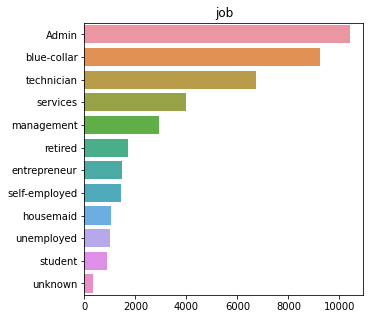

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


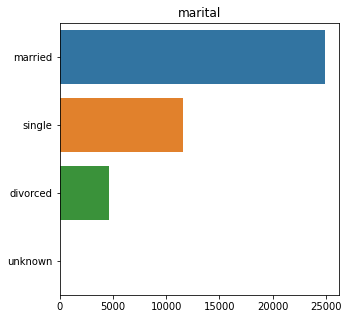

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


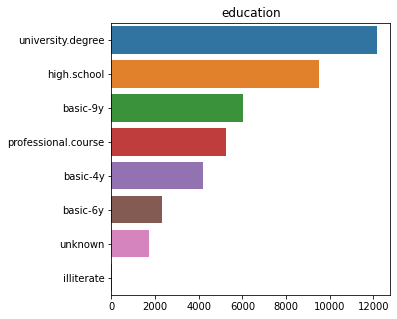

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


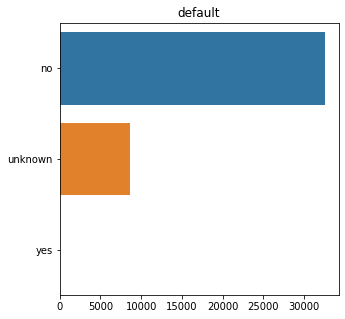

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


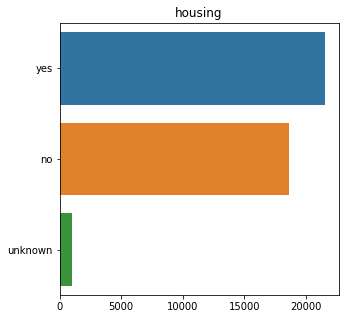

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


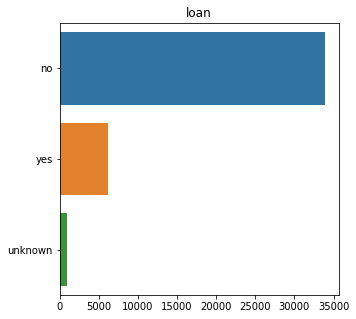

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


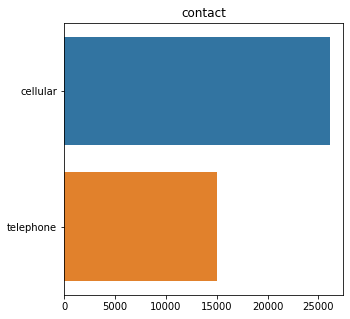

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


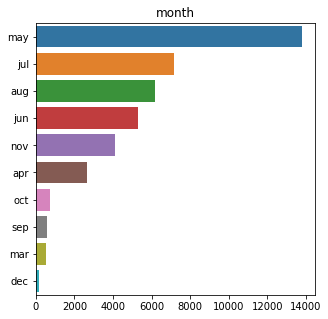

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


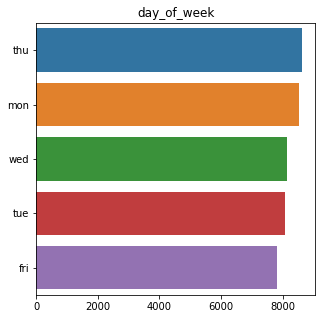

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


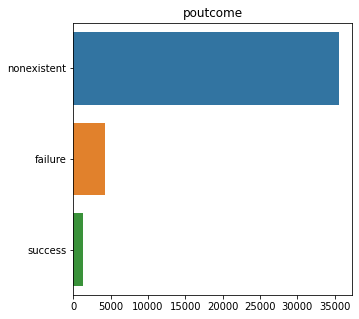

In [49]:
for b in cols:
  plt.figure(figsize=(5,5))
  sns.barplot(data[b].value_counts().values,data[b].value_counts().index)
  plt.title(b)
  plt.show()




Part III : Explore the age column using a histogram and note down your observations

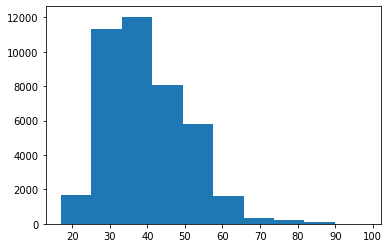

In [50]:
plt.hist(data.age)
plt.show()

Observation from Histogram:  It is Clear from above Histogram that most of client age between 40-45

#Section IV : Categorical Variable Encoding

In [51]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic-4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic-4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [52]:
data.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'Admin', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

Part I : Create dummy variables for your categorial variables

In [53]:
df=pd.get_dummies(data,columns=cols)

part II : Explore your new dataset with these new dummy variables !

In [54]:
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


#Section V : Preliminary Training

Part I : Import your Logisitc Regression libraries

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Part II : Split your train and test dataset and train on the data

In [56]:
X=df.drop(['y'],axis=1)
y=df['y']

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

Part III : Make note of the classification report and other metrics

In [58]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [59]:
Accuracy=model.score(X_test,y_test)
print("Accuracy:",round(Accuracy,2))

Accuracy: 0.91


Part III : Make note of the classification report and other metrics

In [60]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [61]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10978
           1       0.64      0.39      0.49      1379

    accuracy                           0.91     12357
   macro avg       0.78      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



In [62]:
confusion_matrix(y_test,y_predict)

array([[10673,   305],
       [  835,   544]])

In [63]:
compare=pd.DataFrame({"Prediction":y_predict,"Actual":y_test})
compare

,Prediction,Actual
11241,0,0
5326,0,0
25058,0,0
15791,0,0
33639,0,1
...,...,...
35266,0,0
24726,0,0
25292,0,0
1671,0,0


#Section VI : Let's Improve the performance !

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


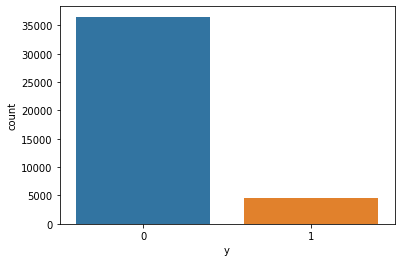

In [64]:
sns.countplot(y)

In [65]:
from  imblearn.over_sampling import SMOTE
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


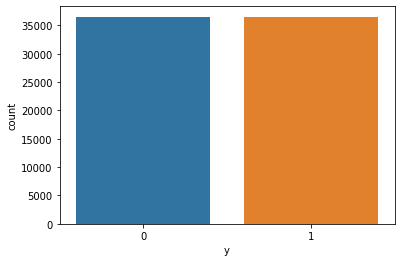

In [66]:
sns.countplot(y_sm)

#Section VII : Let us Re-Train!

In [67]:
Xs_train,Xs_test,ys_train,ys_test=train_test_split(x_sm,y_sm,test_size=0.3)

Part II : Implement your training process inside the RFE

In [68]:
from sklearn.feature_selection import RFE
rfe = RFE(model)
rfe=rfe.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [69]:
print(rfe.support_)

[False False False False  True False False False  True False False  True
  True False False  True False  True  True False  True False False  True
  True False  True  True False False False False  True  True  True  True
 False False False False False False False  True False  True  True  True
  True False  True  True  True  True False False  True  True False  True
  True  True  True]


In [70]:
print(rfe.ranking_)

[22 21 19 26  1  5 16 11  1 18  2  1  1 28  3  1 25  1  1  7  1 27 15  1
  1 24  1  1 13 14 32  6  1  1  1  1 33 29 30 23  9 31 20  1 12  1  1  1
  1 10  1  1  1  1  8 17  1  1  4  1  1  1  1]


#Section VIII : Training time !

In [71]:
model=LogisticRegression()
model.fit(Xs_train,ys_train)
ys_predict=model.predict(Xs_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#Section IX : Additional Metrics

In [72]:
print(classification_report(ys_predict,ys_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     10837
           1       0.87      0.86      0.86     11092

    accuracy                           0.86     21929
   macro avg       0.86      0.86      0.86     21929
weighted avg       0.86      0.86      0.86     21929



In [73]:
confusion_matrix(ys_test,ys_predict)

array([[9362, 1585],
       [1475, 9507]])